In [1]:
# uncomment for the first run
!git clone https://github.com/microsoft/Swin-Transformer.git
!pip install timm
!wget https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_small_patch4_window7_224.pth ./

Cloning into 'Swin-Transformer'...
remote: Enumerating objects: 338, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 338 (delta 35), reused 43 (delta 21), pack-reused 267
Receiving objects: 100% (338/338), 1.04 MiB | 6.95 MiB/s, done.
Resolving deltas: 100% (185/185), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 7.2 MB/s 
--2022-08-07 03:53:41--  https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_small_patch4_window7_224.pth
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/357198522/a0518080-9bd4-11eb-8b38-7260dcd6cb04?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=AKIAIWNJYAX4CSVEH

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! unzip '/content/drive/MyDrive/real-vs-fake.zip'

Streaming output truncated to the last 5000 lines.
  inflating: real-vs-fake/valid/fake/00JMWC4S8R.jpg  
  inflating: real-vs-fake/valid/fake/00V8VPXL3V.jpg  
  inflating: real-vs-fake/valid/fake/00W5NPIX4S.jpg  
  inflating: real-vs-fake/valid/fake/012N2T4FKG.jpg  
  inflating: real-vs-fake/valid/fake/013O4R3GO3.jpg  
  inflating: real-vs-fake/valid/fake/016SOBIEG7.jpg  
  inflating: real-vs-fake/valid/fake/01BEBDIRC8.jpg  
  inflating: real-vs-fake/valid/fake/01NH00JKMJ.jpg  
  inflating: real-vs-fake/valid/fake/01OQZLB87L.jpg  
  inflating: real-vs-fake/valid/fake/023TT8SISF.jpg  
  inflating: real-vs-fake/valid/fake/02ALRVUDUP.jpg  
  inflating: real-vs-fake/valid/fake/02BUIANKWL.jpg  
  inflating: real-vs-fake/valid/fake/02UDY3RXJ0.jpg  
  inflating: real-vs-fake/valid/fake/02WNXR4DIV.jpg  
  inflating: real-vs-fake/valid/fake/02XZQCN0ND.jpg  
  inflating: real-vs-fake/valid/fake/02YW5GZPFO.jpg  
  inflating: real-vs-fake/valid/fake/036PU7OT48.jpg  
  inflating: real-vs-fake/valid

In [4]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

import matplotlib.pyplot as plt
import numpy as np

In [21]:
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 64
EPOCHS = 100
NUM_WORKERS = 4

In [22]:
import os
from torchvision import datasets, transforms
root_dir = "/content/real-vs-fake"
data_transforms = {
    'train':transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),        
    ]),
    'test':transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),      
    ])
}

image_datasets = {}
image_datasets['train'] = datasets.ImageFolder(os.path.join(root_dir, 'train'), data_transforms['train'])
image_datasets['test'] = datasets.ImageFolder(os.path.join(root_dir, 'test'), data_transforms['test'])
image_datasets['val'] = datasets.ImageFolder(os.path.join(root_dir, 'valid'), data_transforms['test'])

In [23]:
batch_size = BATCH_SIZE
data_loader = {x:torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True) for x in ['train','val','test']}
dataset_sizes = {x:len(image_datasets[x]) for x in ['train','val','test']}
print(dataset_sizes)

{'train': 25000, 'val': 5000, 'test': 5000}


In [24]:
class_names = image_datasets['test'].classes
print(class_names)
_ = image_datasets['test'].class_to_idx
cat_to_name = {_[i]:i for i in list(_.keys())}
print(cat_to_name)

images, labels = next(iter(data_loader['train']))
print(images.size())

['fake', 'real']
{0: 'fake', 1: 'real'}
torch.Size([64, 3, 224, 224])


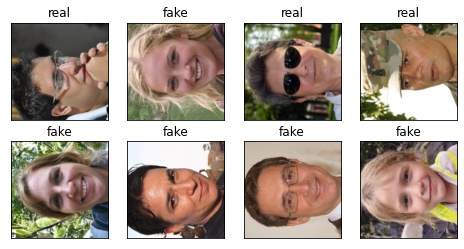

In [25]:
def showimage(data_loader, number_images, cat_to_name):
    dataiter = iter(data_loader)
    images, labels = dataiter.next()
    images = images.numpy() # convert images to numpy for display
    # plot the images in the batch, along with the corresponding labels
    fig = plt.figure(figsize=(number_images, 4))
    for idx in np.arange(number_images):
        ax = fig.add_subplot(2, number_images//2, idx+1, xticks=[], yticks=[])
        img = np.transpose(images[idx])
        plt.imshow(img)
        ax.set_title(cat_to_name[labels.tolist()[idx]])
        
#### to show some  images
showimage(data_loader['test'], 8, cat_to_name)

In [ ]:
#transform = transforms.Compose(
#    [transforms.Resize((224,224)),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
#train_dset = torchvision.datasets.ImageFolder('/content/real-vs-fake/train/', transform=transform)
#test_dset = torchvision.datasets.ImageFolder('/content/real-vs-fake/test/',  transform=transform)

In [ ]:

#trainloader = torch.utils.data.DataLoader(train_dset, batch_size=batch_size,
#                                          shuffle=True, num_workers=2)

#valloader = torch.utils.data.DataLoader(test_dset, batch_size=batch_size,
#                                         shuffle=False, num_workers=2)

#classes = ('fake', 'real')

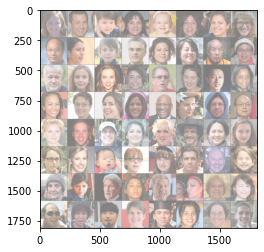

 fake  fake  real  fake  real  fake  fake  real  real  fake  fake  real  real  fake  real  fake  real  fake  fake  real  real  real  real  real  fake  fake  fake  fake  real  real  fake  real  real  fake  fake  fake  real  fake  fake  fake  fake  real  real  real  real  fake  real  real  real  real  real  fake  real  real  fake  real  real  real  real  fake  real  real  real  fake


In [26]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(data_loader['train'])
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
#print labels
print(' '.join('%5s' % class_names[labels[j]] for j in range(BATCH_SIZE)))

In [27]:
%cd "/content/Swin-Transformer"
from models.swin_transformer import SwinTransformer


/content/Swin-Transformer


In [28]:
swin_small_model = SwinTransformer(img_size=224,
                                patch_size=4,
                                in_chans=3,
                                num_classes=1000,
                                embed_dim=96,
                                depths=[2, 2, 18, 2],
                                num_heads=[ 3, 6, 12, 24 ],
                                window_size=7,
                                mlp_ratio=4.,
                                qkv_bias=True,
                                qk_scale=True,
                                drop_rate=0.0,
                                drop_path_rate=0.2,
                                ape=False,
                                patch_norm=True,
                                use_checkpoint=True)


swin_small_model.load_state_dict(torch.load('/content/swin_small_patch4_window7_224.pth')['model'],strict=True)
swin_small_model.head = nn.Linear(swin_small_model.head.in_features, 10)

dummy_x = torch.randn(1, 3, 224, 224)
logits = swin_small_model(dummy_x) 
swin_small_model = swin_small_model.to(device)
print(logits.shape)
print(swin_small_model.head.bias.shape)

torch.Size([1, 10])
torch.Size([10])


In [29]:
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable

from collections import OrderedDict
import numpy as np

model = swin_small_model
input_size = (3,224,224)
batch_size= 32
device="cuda"

def register_hook(module):

    def hook(module, input, output):
        class_name = str(module.__class__).split(".")[-1].split("'")[0]
        module_idx = len(summary)

        m_key = "%s-%i" % (class_name, module_idx + 1)
        summary[m_key] = OrderedDict()
        summary[m_key]["input_shape"] = list(input[0].size())
        summary[m_key]["input_shape"][0] = batch_size
        if isinstance(output, (list, tuple)):
            summary[m_key]["output_shape"] = [
                [-1] + list(o.size())[1:] for o in output
            ]
        else:
            summary[m_key]["output_shape"] = list(output.size())
            summary[m_key]["output_shape"][0] = batch_size

        params = 0
        if hasattr(module, "weight") and hasattr(module.weight, "size"):
            params += torch.prod(torch.LongTensor(list(module.weight.size())))
            summary[m_key]["trainable"] = module.weight.requires_grad
        if hasattr(module, "bias") and hasattr(module.bias, "size"):
            params += torch.prod(torch.LongTensor(list(module.bias.size())))
        summary[m_key]["nb_params"] = params

    if (
        not isinstance(module, nn.Sequential)
        and not isinstance(module, nn.ModuleList)
        and not (module == model)
    ):
        hooks.append(module.register_forward_hook(hook))

device = device.lower()
assert device in [
    "cuda",
    "cpu",
], "Input device is not valid, please specify 'cuda' or 'cpu'"

if device == "cuda" and torch.cuda.is_available():
    dtype = torch.cuda.FloatTensor
else:
    dtype = torch.FloatTensor

# multiple inputs to the network
if isinstance(input_size, tuple):
    input_size = [input_size]

# batch_size of 2 for batchnorm
x = [torch.rand(2, *in_size).type(dtype) for in_size in input_size]
# print(type(x[0]))

# create properties
summary = OrderedDict()
hooks = []

# register hook
model.apply(register_hook)

# make a forward pass
# print(x.shape)
model(*x)

# remove these hooks
for h in hooks:
    h.remove()

print("----------------------------------------------------------------")
line_new = "{:>20}  {:>25} {:>15}".format("Layer (type)", "Output Shape", "Param #")
print(line_new)
print("================================================================")
total_params = 0
total_output = 0
trainable_params = 0
for layer in summary:
    # input_shape, output_shape, trainable, nb_params
    line_new = "{:>20}  {:>25} {:>15}".format(
        layer,
        str(summary[layer]["output_shape"]),
        "{0:,}".format(summary[layer]["nb_params"]),
    )
    total_params += summary[layer]["nb_params"]
    total_output += np.prod(summary[layer]["output_shape"])
    if "trainable" in summary[layer]:
        if summary[layer]["trainable"] == True:
            trainable_params += summary[layer]["nb_params"]
    print(line_new)

# assume 4 bytes/number (float on cuda).
total_input_size = abs(np.prod(input_size) * batch_size * 4. / (1024 ** 2.))
total_output_size = abs(2. * total_output * 4. / (1024 ** 2.))  # x2 for gradients
total_params_size = abs(total_params.numpy() * 4. / (1024 ** 2.))
total_size = total_params_size + total_output_size + total_input_size


summary_df = pd.DataFrame({"Total params": int(total_params),
                   "Trainable params": int(trainable_params),
                   "Non-trainable params": int(total_params - trainable_params),
                   "Input size (MB)": total_input_size,
                   "Forward/backward pass size (MB)":total_output_size,
                   "Params size (MB)":total_params_size,
                   "Estimated Total Size (MB)": total_size},index=[0]).reset_index(drop=True).T

summary_df

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 96, 56, 56]           4,704
         LayerNorm-2             [32, 3136, 96]             192
        PatchEmbed-3             [32, 3136, 96]               0
           Dropout-4             [32, 3136, 96]               0
         LayerNorm-5             [32, 3136, 96]             192
            Linear-6              [32, 49, 288]          27,936
           Softmax-7            [32, 3, 49, 49]               0
           Dropout-8            [32, 3, 49, 49]               0
            Linear-9               [32, 49, 96]           9,312
          Dropout-10               [32, 49, 96]               0
  WindowAttention-11               [32, 49, 96]               0
         Identity-12             [32, 3136, 96]               0
        LayerNorm-13             [32, 3136, 96]             192
           Linear-14            [32, 31

,0
Total params,4.879729e+07
Trainable params,4.879729e+07
Non-trainable params,0.000000e+00
Input size (MB),1.837500e+01
Forward/backward pass size (MB),1.300495e+04
Params size (MB),1.861469e+02
Estimated Total Size (MB),1.320947e+04


In [30]:
import torch.optim as optim
lr = 5e-04
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(swin_small_model.parameters(), lr=lr, momentum=0.9)

In [31]:
!pip install wandb -qqq
import wandb
# Log in to your W&B account
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [43]:
# Start a run, tracking hyperparameters
run = wandb.init(
  project="swin transformer small-Transfer learning",
  config={
      "summary": summary_df,
      "optimizer": optimizer,
      "loss": criterion,
      "learning rate": lr,
      "metric": "accuracy",
      "epoch": 120,
      "batch_size": 64,
  })
config = wandb.config

In [33]:
from tqdm.notebook import tqdm
from time import time

for epoch in tqdm(range(EPOCHS), "Epoch: "): 
    swin_small_model.train()
    optimizer.zero_grad()

    start = time()


    running_loss = 0.0
    tqdm_train = tqdm(enumerate(data_loader['train'], 0), "Train step: ", total=len(data_loader['train']))
    for i, data in tqdm_train:

        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = swin_small_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        tqdm_train.set_postfix(loss=loss.item())
        

    
    epoch_time = time() - start
    print(f"Epoch time: {epoch_time/60:.3f} min" )
    print(f"Epoch {epoch + 1} Train loss: {running_loss / len(data_loader['train']):.3f}")
    len_trainloader = len(data_loader['train'])
    wandb.log({"Epoch":epoch + 1,
               "Epoch time": epoch_time/60,
               "Train loss":running_loss/len_trainloader,
               })
    
    running_loss = 0.0
    correct_pred = {classname: 0 for classname in class_names}
    total_pred = {classname: 0 for classname in class_names}

    with torch.no_grad():
        swin_small_model.eval()
        tqdm_val = tqdm(enumerate(data_loader['val'], 0), "Val step: ", total=len(data_loader['val']))
        for i, data in tqdm_val:
            inputs, labels = data[0].to(device), data[1].to(device)  
            outputs = swin_small_model(inputs)
            loss = criterion(outputs, labels)
            # print statistics
            running_loss += loss.item()
            tqdm_val.set_postfix(loss=loss.item())
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in list(zip(labels, predictions)):
                if label == prediction:
                    correct_pred[class_names[label]] += 1
                total_pred[class_names[label]] += 1 
               
    # print accuracy for each class
    accuracy_sum = []
    classnames = []
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        accuracy_sum.append(accuracy)
        classnames.append(classname)
        print(f"Accuracy for class {classname}: {accuracy:.1f}%")  
        
    classnames_accuracy = list(zip(classnames,accuracy_sum))
    print(f"Epoch {epoch + 1} Val loss: {running_loss / len(data_loader['val']):.3f}")
    print(f"Total accuracy: {sum(accuracy_sum)/len(accuracy_sum)}")
    len_valloader = len(data_loader['val'])
    wandb.log({"Epoch":epoch + 1, 
               "Val loss":running_loss / len_valloader,
               "Accuracy by class": classnames_accuracy,
               "Total accuracy": sum(accuracy_sum)/len(accuracy_sum),
               })

# Mark the run as finished
wandb.finish()
print('Training comleted')

Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 1 Train loss: 0.757


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


Accuracy for class fake: 98.4%
Accuracy for class real: 2.2%
Epoch 1 Val loss: 0.700
Total accuracy: 50.3


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.992 min
Epoch 2 Train loss: 0.699


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 6.8%
Accuracy for class real: 95.8%
Epoch 2 Val loss: 0.695
Total accuracy: 51.300000000000004


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 3 Train loss: 0.696


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 52.2%
Accuracy for class real: 59.0%
Epoch 3 Val loss: 0.686
Total accuracy: 55.599999999999994


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.992 min
Epoch 4 Train loss: 0.693


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 58.8%
Accuracy for class real: 54.4%
Epoch 4 Val loss: 0.684
Total accuracy: 56.58


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.992 min
Epoch 5 Train loss: 0.692


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 46.4%
Accuracy for class real: 67.4%
Epoch 5 Val loss: 0.684
Total accuracy: 56.879999999999995


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.991 min
Epoch 6 Train loss: 0.692


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 72.1%
Accuracy for class real: 38.4%
Epoch 6 Val loss: 0.685
Total accuracy: 55.26


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 7 Train loss: 0.690


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 73.8%
Accuracy for class real: 35.8%
Epoch 7 Val loss: 0.684
Total accuracy: 54.8


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.992 min
Epoch 8 Train loss: 0.686


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 77.4%
Accuracy for class real: 32.2%
Epoch 8 Val loss: 0.685
Total accuracy: 54.8


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.992 min
Epoch 9 Train loss: 0.686


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 79.9%
Accuracy for class real: 29.0%
Epoch 9 Val loss: 0.686
Total accuracy: 54.42


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.992 min
Epoch 10 Train loss: 0.685


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 57.2%
Accuracy for class real: 57.7%
Epoch 10 Val loss: 0.678
Total accuracy: 57.46


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.990 min
Epoch 11 Train loss: 0.684


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 34.8%
Accuracy for class real: 78.9%
Epoch 11 Val loss: 0.685
Total accuracy: 56.81999999999999


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.992 min
Epoch 12 Train loss: 0.684


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 71.0%
Accuracy for class real: 41.3%
Epoch 12 Val loss: 0.680
Total accuracy: 56.16


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.992 min
Epoch 13 Train loss: 0.680


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 80.9%
Accuracy for class real: 29.6%
Epoch 13 Val loss: 0.688
Total accuracy: 55.239999999999995


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 14 Train loss: 0.681


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 66.6%
Accuracy for class real: 48.9%
Epoch 14 Val loss: 0.675
Total accuracy: 57.739999999999995


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 15 Train loss: 0.680


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 31.0%
Accuracy for class real: 82.9%
Epoch 15 Val loss: 0.681
Total accuracy: 56.94


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 16 Train loss: 0.678


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 55.8%
Accuracy for class real: 62.7%
Epoch 16 Val loss: 0.669
Total accuracy: 59.26


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 17 Train loss: 0.675


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 49.3%
Accuracy for class real: 70.2%
Epoch 17 Val loss: 0.667
Total accuracy: 59.739999999999995


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 18 Train loss: 0.671


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 50.9%
Accuracy for class real: 68.1%
Epoch 18 Val loss: 0.666
Total accuracy: 59.5


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 19 Train loss: 0.667


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 68.3%
Accuracy for class real: 53.4%
Epoch 19 Val loss: 0.653
Total accuracy: 60.879999999999995


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.992 min
Epoch 20 Train loss: 0.664


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 80.7%
Accuracy for class real: 38.4%
Epoch 20 Val loss: 0.664
Total accuracy: 59.56


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 21 Train loss: 0.659


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 61.1%
Accuracy for class real: 63.4%
Epoch 21 Val loss: 0.643
Total accuracy: 62.239999999999995


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.992 min
Epoch 22 Train loss: 0.652


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 51.0%
Accuracy for class real: 73.8%
Epoch 22 Val loss: 0.651
Total accuracy: 62.36


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 23 Train loss: 0.652


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 87.2%
Accuracy for class real: 34.2%
Epoch 23 Val loss: 0.659
Total accuracy: 60.72


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 24 Train loss: 0.650


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 80.6%
Accuracy for class real: 43.4%
Epoch 24 Val loss: 0.644
Total accuracy: 61.96


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 25 Train loss: 0.647


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 70.2%
Accuracy for class real: 56.3%
Epoch 25 Val loss: 0.634
Total accuracy: 63.26


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 26 Train loss: 0.643


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 56.3%
Accuracy for class real: 71.4%
Epoch 26 Val loss: 0.630
Total accuracy: 63.86


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 27 Train loss: 0.636


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 85.2%
Accuracy for class real: 38.4%
Epoch 27 Val loss: 0.654
Total accuracy: 61.78


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5034068ef0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1481, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1464, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5034068ef0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1481, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1464, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch time: 6.993 min
Epoch 28 Train loss: 0.637


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 80.1%
Accuracy for class real: 48.1%
Epoch 28 Val loss: 0.631
Total accuracy: 64.08


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 29 Train loss: 0.634


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 74.3%
Accuracy for class real: 55.4%
Epoch 29 Val loss: 0.622
Total accuracy: 64.88


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 30 Train loss: 0.624


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 45.5%
Accuracy for class real: 83.4%
Epoch 30 Val loss: 0.628
Total accuracy: 64.48


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 31 Train loss: 0.626


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 68.0%
Accuracy for class real: 63.6%
Epoch 31 Val loss: 0.617
Total accuracy: 65.8


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.992 min
Epoch 32 Train loss: 0.622


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 50.3%
Accuracy for class real: 81.2%
Epoch 32 Val loss: 0.618
Total accuracy: 65.75999999999999


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5034068ef0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1481, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1464, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5034068ef0>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5034068ef0>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1481, in __del__
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/

Epoch time: 7.001 min
Epoch 33 Train loss: 0.618


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 59.5%
Accuracy for class real: 74.6%
Epoch 33 Val loss: 0.607
Total accuracy: 67.06


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 34 Train loss: 0.613


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 67.2%
Accuracy for class real: 67.7%
Epoch 34 Val loss: 0.597
Total accuracy: 67.44


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 35 Train loss: 0.611


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 58.4%
Accuracy for class real: 76.4%
Epoch 35 Val loss: 0.598
Total accuracy: 67.42


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.996 min
Epoch 36 Train loss: 0.604


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 79.2%
Accuracy for class real: 53.2%
Epoch 36 Val loss: 0.607
Total accuracy: 66.19999999999999


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 37 Train loss: 0.603


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 64.3%
Accuracy for class real: 72.6%
Epoch 37 Val loss: 0.591
Total accuracy: 68.44


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 38 Train loss: 0.598


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 41.1%
Accuracy for class real: 87.3%
Epoch 38 Val loss: 0.640
Total accuracy: 64.2


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 39 Train loss: 0.595


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 55.7%
Accuracy for class real: 82.5%
Epoch 39 Val loss: 0.594
Total accuracy: 69.1


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.996 min
Epoch 40 Train loss: 0.587


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 48.6%
Accuracy for class real: 86.0%
Epoch 40 Val loss: 0.616
Total accuracy: 67.3


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.996 min
Epoch 41 Train loss: 0.583


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 62.4%
Accuracy for class real: 77.1%
Epoch 41 Val loss: 0.579
Total accuracy: 69.74


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 42 Train loss: 0.579


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 67.0%
Accuracy for class real: 74.1%
Epoch 42 Val loss: 0.568
Total accuracy: 70.52


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 43 Train loss: 0.578


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 85.2%
Accuracy for class real: 48.1%
Epoch 43 Val loss: 0.606
Total accuracy: 66.67999999999999


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 44 Train loss: 0.570


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 71.6%
Accuracy for class real: 71.0%
Epoch 44 Val loss: 0.554
Total accuracy: 71.34


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 45 Train loss: 0.561


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 80.1%
Accuracy for class real: 61.2%
Epoch 45 Val loss: 0.559
Total accuracy: 70.62


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 46 Train loss: 0.567


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 60.5%
Accuracy for class real: 82.0%
Epoch 46 Val loss: 0.563
Total accuracy: 71.24


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 47 Train loss: 0.553


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 73.9%
Accuracy for class real: 70.2%
Epoch 47 Val loss: 0.545
Total accuracy: 72.02


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 48 Train loss: 0.550


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 68.7%
Accuracy for class real: 75.8%
Epoch 48 Val loss: 0.548
Total accuracy: 72.24000000000001


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 49 Train loss: 0.542


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 69.0%
Accuracy for class real: 76.7%
Epoch 49 Val loss: 0.536
Total accuracy: 72.84


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.996 min
Epoch 50 Train loss: 0.538


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 67.0%
Accuracy for class real: 77.8%
Epoch 50 Val loss: 0.538
Total accuracy: 72.42


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 51 Train loss: 0.536


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 71.9%
Accuracy for class real: 76.5%
Epoch 51 Val loss: 0.527
Total accuracy: 74.18


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 52 Train loss: 0.529


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 62.4%
Accuracy for class real: 83.4%
Epoch 52 Val loss: 0.543
Total accuracy: 72.86


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 53 Train loss: 0.523


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 72.3%
Accuracy for class real: 76.1%
Epoch 53 Val loss: 0.520
Total accuracy: 74.22


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 54 Train loss: 0.520


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 75.2%
Accuracy for class real: 73.3%
Epoch 54 Val loss: 0.520
Total accuracy: 74.24


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 55 Train loss: 0.511


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 70.6%
Accuracy for class real: 79.6%
Epoch 55 Val loss: 0.505
Total accuracy: 75.1


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 56 Train loss: 0.498


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 74.2%
Accuracy for class real: 75.8%
Epoch 56 Val loss: 0.499
Total accuracy: 75.0


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 57 Train loss: 0.498


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 73.6%
Accuracy for class real: 77.1%
Epoch 57 Val loss: 0.503
Total accuracy: 75.32


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.992 min
Epoch 58 Train loss: 0.491


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 72.8%
Accuracy for class real: 80.1%
Epoch 58 Val loss: 0.488
Total accuracy: 76.42


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 59 Train loss: 0.483


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 69.5%
Accuracy for class real: 81.4%
Epoch 59 Val loss: 0.501
Total accuracy: 75.44


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 60 Train loss: 0.477


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 76.5%
Accuracy for class real: 75.0%
Epoch 60 Val loss: 0.493
Total accuracy: 75.78


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 61 Train loss: 0.469


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 74.1%
Accuracy for class real: 80.2%
Epoch 61 Val loss: 0.476
Total accuracy: 77.12


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 62 Train loss: 0.468


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 54.8%
Accuracy for class real: 91.3%
Epoch 62 Val loss: 0.547
Total accuracy: 73.03999999999999


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 63 Train loss: 0.458


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 67.0%
Accuracy for class real: 84.6%
Epoch 63 Val loss: 0.486
Total accuracy: 75.8


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 64 Train loss: 0.453


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 79.8%
Accuracy for class real: 73.6%
Epoch 64 Val loss: 0.484
Total accuracy: 76.72


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 65 Train loss: 0.451


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 84.7%
Accuracy for class real: 68.0%
Epoch 65 Val loss: 0.495
Total accuracy: 76.36000000000001


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 66 Train loss: 0.443


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 72.4%
Accuracy for class real: 80.0%
Epoch 66 Val loss: 0.495
Total accuracy: 76.18


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.992 min
Epoch 67 Train loss: 0.439


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 71.2%
Accuracy for class real: 84.5%
Epoch 67 Val loss: 0.463
Total accuracy: 77.84


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 68 Train loss: 0.424


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 74.8%
Accuracy for class real: 82.6%
Epoch 68 Val loss: 0.448
Total accuracy: 78.74000000000001


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 69 Train loss: 0.423


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 83.7%
Accuracy for class real: 72.1%
Epoch 69 Val loss: 0.449
Total accuracy: 77.92


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.992 min
Epoch 70 Train loss: 0.418


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 89.9%
Accuracy for class real: 62.1%
Epoch 70 Val loss: 0.517
Total accuracy: 75.97999999999999


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 71 Train loss: 0.405


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 69.7%
Accuracy for class real: 88.1%
Epoch 71 Val loss: 0.463
Total accuracy: 78.9


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 72 Train loss: 0.404


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 70.4%
Accuracy for class real: 87.9%
Epoch 72 Val loss: 0.466
Total accuracy: 79.14


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 73 Train loss: 0.398


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 79.4%
Accuracy for class real: 80.0%
Epoch 73 Val loss: 0.436
Total accuracy: 79.72


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.996 min
Epoch 74 Train loss: 0.388


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 72.8%
Accuracy for class real: 85.6%
Epoch 74 Val loss: 0.467
Total accuracy: 79.2


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 75 Train loss: 0.386


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 90.4%
Accuracy for class real: 68.3%
Epoch 75 Val loss: 0.466
Total accuracy: 79.34


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 76 Train loss: 0.374


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 78.2%
Accuracy for class real: 82.0%
Epoch 76 Val loss: 0.425
Total accuracy: 80.1


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.997 min
Epoch 77 Train loss: 0.375


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 82.5%
Accuracy for class real: 79.4%
Epoch 77 Val loss: 0.426
Total accuracy: 80.94


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.996 min
Epoch 78 Train loss: 0.367


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 80.1%
Accuracy for class real: 81.6%
Epoch 78 Val loss: 0.431
Total accuracy: 80.82


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.996 min
Epoch 79 Train loss: 0.360


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 74.0%
Accuracy for class real: 87.3%
Epoch 79 Val loss: 0.425
Total accuracy: 80.66


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 80 Train loss: 0.354


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 78.0%
Accuracy for class real: 84.9%
Epoch 80 Val loss: 0.409
Total accuracy: 81.44


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 81 Train loss: 0.351


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 78.6%
Accuracy for class real: 83.8%
Epoch 81 Val loss: 0.420
Total accuracy: 81.18


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 82 Train loss: 0.343


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 83.1%
Accuracy for class real: 78.2%
Epoch 82 Val loss: 0.417
Total accuracy: 80.66


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.996 min
Epoch 83 Train loss: 0.337


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 78.1%
Accuracy for class real: 85.1%
Epoch 83 Val loss: 0.407
Total accuracy: 81.6


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.996 min
Epoch 84 Train loss: 0.338


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 83.8%
Accuracy for class real: 79.8%
Epoch 84 Val loss: 0.400
Total accuracy: 81.76


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 85 Train loss: 0.327


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 91.9%
Accuracy for class real: 66.8%
Epoch 85 Val loss: 0.491
Total accuracy: 79.36


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 86 Train loss: 0.327


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 92.3%
Accuracy for class real: 66.2%
Epoch 86 Val loss: 0.483
Total accuracy: 79.25999999999999


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.996 min
Epoch 87 Train loss: 0.319


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 82.3%
Accuracy for class real: 82.0%
Epoch 87 Val loss: 0.408
Total accuracy: 82.16


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 88 Train loss: 0.313


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 82.0%
Accuracy for class real: 82.8%
Epoch 88 Val loss: 0.394
Total accuracy: 82.36


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 89 Train loss: 0.304


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 87.1%
Accuracy for class real: 76.0%
Epoch 89 Val loss: 0.414
Total accuracy: 81.53999999999999


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 90 Train loss: 0.300


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 81.6%
Accuracy for class real: 83.4%
Epoch 90 Val loss: 0.404
Total accuracy: 82.47999999999999


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 91 Train loss: 0.295


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 90.8%
Accuracy for class real: 69.9%
Epoch 91 Val loss: 0.441
Total accuracy: 80.34


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.996 min
Epoch 92 Train loss: 0.287


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 81.4%
Accuracy for class real: 84.1%
Epoch 92 Val loss: 0.392
Total accuracy: 82.75999999999999


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 93 Train loss: 0.282


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 81.8%
Accuracy for class real: 83.5%
Epoch 93 Val loss: 0.390
Total accuracy: 82.64


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.997 min
Epoch 94 Train loss: 0.274


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 81.2%
Accuracy for class real: 84.6%
Epoch 94 Val loss: 0.406
Total accuracy: 82.91999999999999


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 95 Train loss: 0.272


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 85.7%
Accuracy for class real: 79.7%
Epoch 95 Val loss: 0.412
Total accuracy: 82.7


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 96 Train loss: 0.267


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 89.9%
Accuracy for class real: 75.5%
Epoch 96 Val loss: 0.432
Total accuracy: 82.7


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.993 min
Epoch 97 Train loss: 0.253


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 85.4%
Accuracy for class real: 80.7%
Epoch 97 Val loss: 0.398
Total accuracy: 83.06


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.994 min
Epoch 98 Train loss: 0.252


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 81.3%
Accuracy for class real: 84.9%
Epoch 98 Val loss: 0.389
Total accuracy: 83.12


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.995 min
Epoch 99 Train loss: 0.251


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 83.4%
Accuracy for class real: 84.0%
Epoch 99 Val loss: 0.407
Total accuracy: 83.72


Train step:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch time: 6.997 min
Epoch 100 Train loss: 0.238


Val step:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy for class fake: 81.5%
Accuracy for class real: 86.4%
Epoch 100 Val loss: 0.389
Total accuracy: 83.96000000000001


Epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
Epoch time,▄▄▂▂▁▃▃▃▃▃▃▃▃▅▇▅▆▄▅▄▆▃▅▅▅▄▃▃▅▆█▇▅▆▇▆▆▇▃█
Total accuracy,▁▂▂▂▂▂▃▃▃▃▄▄▄▅▄▅▅▅▅▆▆▆▆▆▇▆▇▇▇▇▇▇▇██▇████
Train loss,█▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Val loss,██████▇▇▇▇▆▆▆▆▆▆▅▅▅▄▄▄▃▄▃▃▃▂▃▃▂▂▂▁▁▂▁▁▁▁
Epoch,100
Epoch time,6.99746
Total accuracy,83.96
Train loss,0.23842
Val loss,0.38879


Training comleted


In [34]:
# Code taken from https://www.kaggle.com/ayuraj/interactive-eda-using-w-b-tables

# This is just to display the W&B run page in this interactive session.
from IPython import display

# we create an IFrame and set the width and height
iF = display.IFrame(run.url, width=1000, height=720)
iF

In [35]:

DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("device:", DEVICE)

device: cuda


In [36]:
PATH = './model_small.pth'
torch.save(swin_small_model.state_dict(), PATH)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
import time
import math
import copy
checkpoint = torch.load('/content/Swin-Transformer/model_small.pth')
def load_model(path):                                
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss =0.38
    best_acc = 83.96
load_model('/content/Swin-Transformer/model_small.pth')  
model = model.to(DEVICE)

Testing complete in 0m 22s
              precision    recall  f1-score   support

           0     0.8725    0.9168    0.8941      2500
           1     0.9123    0.8660    0.8886      2500

    accuracy                         0.8914      5000
   macro avg     0.8924    0.8914    0.8913      5000
weighted avg     0.8924    0.8914    0.8913      5000



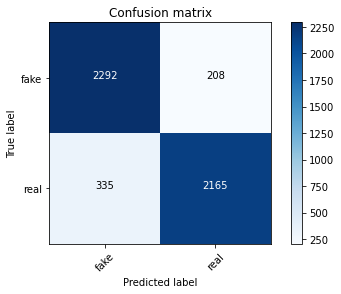

In [40]:

since = time.time()
model.eval()
y_test = []
y_pred = []
for images, labels in data_loader['test']:
    images = images.to(DEVICE)
    labels = labels.to(DEVICE)
    outputs = model(images)
    _, predictions = outputs.max(1)
    
    y_test.append(labels.data.cpu().numpy())
    y_pred.append(predictions.data.cpu().numpy())
    
y_test = np.concatenate(y_test)
y_pred = np.concatenate(y_pred)
time_elapsed = time.time() - since

print('Testing complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

confusion_mtx = confusion_matrix(y_test, y_pred)
# plot the confusion matrix
plot_labels = ['fake', 'real']

plot_confusion_matrix(confusion_mtx, plot_labels)
report = classification_report(y_test, y_pred, digits=4)
print(report)

Area under the Receiver Operating Characteristic curve: 0.8914000000000001


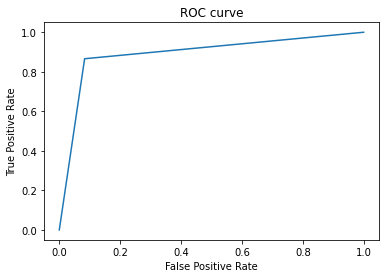

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred))